## 피마인디언 당뇨병 예측을 위한 기계학습코드(그림포함)

- 아래 코드는 조태호 저, "모두의딥러닝" 도서 11장에서 발췌한 내용입니다.
- 처음에는 어려워보일텐데, 기초부터 공부하면 매우 평이한 내용이니, 너무 두려워하지 않으셔도 됩니다.
- 여기에서는 이렇게 몇줄의 코드로 예측 또는 분류를 할 수 있는 기계학습 프로그램을 짤 수 있구나 하는 정도로 이해를 하시면 되겠습니다.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# 데이터 로드
df = pd.read_csv("pima-indians-diabetes.csv", names=["pregnant", "plasma", "pressure", 
                                                     "thickness", "insulin", "BMI", "pedigree", 
                                                     "age", "class"])


Input Variables (X):

pregnat: 과거임신회수   
plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도(mmHg)  
pressure: 확장기혈압(mmHg)  
glucose concentration a 2 hours in an oral glucose tolerance test    
thickness: 삼두근 피부 주름 두께(mm)   
insulin: 혈청인슐린(mu U/ml)    
BMI: 체질량지수(weight in kg/(height in m)^2)    
pedigree: 당뇨병가족력   
age: 나이 (years)    

Output Variables (y):

Class variable (0 or 1)

In [3]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
X = dataset[:, 0:8]
Y = dataset[:, 8]

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

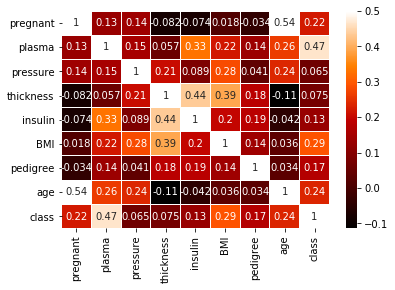

In [9]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, 
            cmap=plt.cm.gist_heat, linecolor='white', annot=True)

plt.show()

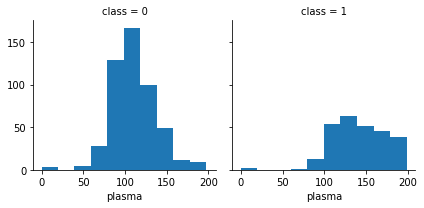

In [10]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10) # plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도(mmHg)
plt.show()

In [11]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/200
768/768 [==============================] - 0s 215us/step - loss: 13.5876 - accuracy: 0.6510
Epoch 2/200
768/768 [==============================] - 0s 61us/step - loss: 1.9540 - accuracy: 0.5013
Epoch 3/200
768/768 [==============================] - 0s 68us/step - loss: 0.8434 - accuracy: 0.4036
Epoch 4/200
768/768 [==============================] - 0s 73us/step - loss: 0.7489 - accuracy: 0.3854
Epoch 5/200
768/768 [==============================] - 0s 85us/step - loss: 0.7129 - accuracy: 0.4062
Epoch 6/200
768/768 [==============================] - 0s 94us/step - loss: 0.6882 - accuracy: 0.5026
Epoch 7/200
768/768 [==============================] - 0s 90us/step - loss: 0.6759 - accuracy: 0.6510
Epoch 8/200
768/768 [==============================] - 0s 92us/step - loss: 0.6680 - accuracy: 0.6510
Epoch 9/200
768/768 [==============================] - 0s 98us/step - loss: 0.6630 - accuracy: 0.6510
Epoch 10/200
768/768 [==============================] - 0s 166us/step - loss: 0.

768/768 [==============================] - 0s 94us/step - loss: 0.6199 - accuracy: 0.6510
Epoch 81/200
768/768 [==============================] - 0s 92us/step - loss: 0.6215 - accuracy: 0.6510
Epoch 82/200
768/768 [==============================] - 0s 92us/step - loss: 0.6246 - accuracy: 0.6510
Epoch 83/200
768/768 [==============================] - 0s 91us/step - loss: 0.6247 - accuracy: 0.6510
Epoch 84/200
768/768 [==============================] - 0s 91us/step - loss: 0.6271 - accuracy: 0.6510
Epoch 85/200
768/768 [==============================] - 0s 91us/step - loss: 0.6223 - accuracy: 0.6510
Epoch 86/200
768/768 [==============================] - 0s 91us/step - loss: 0.6239 - accuracy: 0.6510
Epoch 87/200
768/768 [==============================] - 0s 91us/step - loss: 0.6252 - accuracy: 0.6510
Epoch 88/200
768/768 [==============================] - 0s 92us/step - loss: 0.6219 - accuracy: 0.6510
Epoch 89/200
768/768 [==============================] - 0s 92us/step - loss: 0.6299 - 

768/768 [==============================] - 0s 85us/step - loss: 0.6198 - accuracy: 0.6510
Epoch 159/200
768/768 [==============================] - 0s 83us/step - loss: 0.6221 - accuracy: 0.6510
Epoch 160/200
768/768 [==============================] - 0s 86us/step - loss: 0.6173 - accuracy: 0.6510
Epoch 161/200
768/768 [==============================] - 0s 87us/step - loss: 0.6197 - accuracy: 0.6510
Epoch 162/200
768/768 [==============================] - 0s 92us/step - loss: 0.6147 - accuracy: 0.6510
Epoch 163/200
768/768 [==============================] - 0s 92us/step - loss: 0.6140 - accuracy: 0.6510
Epoch 164/200
768/768 [==============================] - 0s 92us/step - loss: 0.6193 - accuracy: 0.6510
Epoch 165/200
768/768 [==============================] - 0s 92us/step - loss: 0.6151 - accuracy: 0.6510
Epoch 166/200
768/768 [==============================] - 0s 91us/step - loss: 0.6205 - accuracy: 0.6510
Epoch 167/200
768/768 [==============================] - 0s 94us/step - loss: 